# ARIMA: Stochastic Processes 2
# Conductor: Prof Aleksei Chechkin
## A Brief Introduction to ARIMA Processes and Time-Series Modelling
### Lecturer: Yousof Mardoukhi

## Stationary Processes
Let $\{ X_t \}$ be a random process indexed by $t$. Define the mean and the covariance functions as
1. $\mu_X (t) = \mathbb{E}(X_t)$
2. $\gamma_X(r, s) = \mathrm{Cov}(X_r, X_s) = \mathbb{E}[(X_r - \mu_X(r))(X_s - \mu_X(s))]$

We say the process is weekly stationary if (i) $\mu_X(t)$ is independent of $t$ and (ii) $\gamma_X(t+h, t)$ is independent of $t$ for all $h$.

We say the random process $\{X_t\}$ is strongly stationary if the unconditional joint probability distribution $P(x_1, x_2, ..., x_n)$ remains invariant under translational symmetry under time shifts. In other words

$$ P(x_{1+h}, x_{2+h}, ..., x_{n+h}) = P(x_1, x_2, ..., x_n)$$

is independent of $h$ for all $t\in \mathbb{N}$, which imples that $P$ is independent of time.

Generally, one can write the time-series $\{X_t\}$ in the following form

$$X_t = m_t + s_t + Y_t$$

where $m_t$ i a slowly varying component known as the _trend_ , $s_t$ is the _seasonal_ component which has a known period and $Y_t$ is a _stationary random noise_.

### Parametric estimation of the trend (in the absence of seasonality)
Assume that 

$$X_t = m_t + Y_t$$
#### 1. Smoothning with a finite moving average
For a window of size $2q$ the moving average of the random process $X_t$ is given by

$$W_t = (2q+1)^{-1}\sum_{i=-q}^{q} X_{t-i}\quad; 1+q < t < n-q$$

$$W_t = (2q+1)^{-1}\sum_{i=-q}^{q} m_{t-i} + (2q+1)^{-1}\sum_{i=-q}^{q} Y_{t-i}$$

The first sum is simlpy the trend. Recall that $m_t$ varies slowly. The second sum, is a constant, since $Y_t$ is stationary. Thus, $W_t \approx m_t + C$.

#### 2. Exponential smoothning

For any fixed $\alpha \in [0, 1]$ the one sided moving average $\hat{m_t}$ for $t\in \mathbb{N}$ is given by

$$\hat{m_t} = \alpha X_t + (1-\alpha)\hat{m_{t-1}} = \alpha X_t + \alpha(1-\alpha)X_{t-1} + (1-\alpha)^2\hat{m_{t-2}}$$

And thus recursively

$$\hat{m_t} = \sum_{j=0}^{t} \alpha(1-\alpha)^j X_{t-j}$$

There are other methods such is _Fourier Analysis_ of the time-series to identify the dominant frequencies and _polynomial fitting_. In the Fourier analysis, one sets a frequency threshold to remove the frequencies below with low amplitutes to remove the background noise. Smoothing with finite moving average, exponential smoothing, Fourier analysis and polynomial fitting all belong to the class of _parametric_ smoothing, which means that one has to set a parameter and tune that parameter to achieve a smoothened time-series.

### Non-parametric elimination of the trend
#### Elimination by finite differentiation

$$X_t = m_t + Y_t \rightarrow X_t - X_{t-1} = m_t - m_{t-1} + Y_t - Y_{t-1}$$

if $m_t = c_0 + c_1 t$ then $m_t - m_{t-1} = c_1$. Therefore,

$$X_t - X_{t-1} = c_1 + Y_t - Y_{t-1} \rightarrow \nabla X_t = c_1 + \nabla Y_t$$.

Where $\nabla^k$ is the differetial operator of order $k$. By differentiating onec, one makes the random process $X_t$ stationary. Note that differentiation of any order of a stationary process is a stationary process.

One can write $\nabla$ as $(1-B)$ from which one deduces that $B X_t = X_{t-1}$. The operator $B$ is called the _shift_ operator (it is also called the Bernoulli shift operator which appears in the mixing theory and Chaos in infinite dimensional Hilbert spaces. It is worth to mention that $B$ is a linear operator).

Generally, if $m_t = \sum_{j=0}^{k} c_j t^k$ then $\nabla^k X_t = k!c_k + \nabla^k Y_t$ is a stationary process.

The action of the differential operator $\nabla$ of higher order can be recursively deduced. For instance

$$\nabla^2 X_t = \nabla(\nabla X_t) = \nabla (X_t - X_{t-1}) = X_t - 2X_{t-1} + X_{t-2}$$

Therefore,

$$\nabla ^k X_t = \sum_{n=0}^k (-1)^n {k \choose n} X_{t-n}$$

### Non-parametric elimination of the seasonality
#### Eilimination by finite differentiation

Seasonality like the trend can be eliminated by finite differentiation. Yet, there is a subtle difference between the two. Seasonality in time-series arises due to regular repetative behaviours. For intance the number of flu is high during the winter time and goes down during the summer time. Thus one can talk about a 12-month seasonal pattern. Mathematicall we can forumalet it as the following. Let $s_t$ be seasonality with period $d$.

$$X_{t+d} = s_{t+d} + Y_{t+d} \rightarrow X_{t+d} = s_t + Y_{t+d}$$

Thus

$$X_{t+d} - X_{t} = Y_{t+d} - Y_{t} \rightarrow \nabla_d X_t = \nabla_d Y_t$$

We defined the seasonal differential operater, $\nabla_d$ which its action on $X_t$ yields a stationary process.

## Moving Average (MA) processes
The random process $X_t$ is a moving average process of order $q$ if it has the following representation

$$X_t = \sum_{j=0}^q \psi_j B^j Z_t = \psi_0 Z_t + \psi_1 Z_{t-1} + ... + \psi_q Z_{t-q}$$

where $Z_t \sim WN(0, \sigma^2)$ and $WN$ stands on Wienner process with zero mean and $\sigma^2$ variance. One says that $X_t \sim MA(q)$. This process is said to be _q-correlated_ or _q-dependant_ since $\gamma(h) \rightarrow 0$ when $h > q$ which implies that $X_{t+h}$ and $X_{t}$ are independent. $X_t$ is strictly stationary since $Z_t$ is strictly stationary. Thus every stationary $q$-correlated process $\{X_t\}$ has a $MA(q)$ representation.

$MA(q)$ process is a subclass of a more general class of processes called _linear_. They are defined as 

$$X_t = \sum_{j=-\infty}^{\infty} \psi_j Z_{t-j} = \sum_{j=-\infty}^{\infty} \psi_j B^j Z_t = \psi(B)Z_t$$

Since $X_t$ is measurable, meaning that it is finite, $\mathbb{E}(|X_t|) < \infty$. This implies that 

$$\sum_{j=-\infty}^{\infty} \mathbb{E}(|\psi_j Z_{t-j}|) = \sum_{j=-\infty}^{\infty} |\psi_j|\mathbb{E}(|Z_{t-j}|) = \sum_{j=-\infty}^{\infty} \sigma |\psi_j| < \infty$$

which implies that 

$$\sum_{j=-\infty}^{\infty} |\psi_j| < \infty$$

Similarly, one can show that $\sum_{j=-\infty}^{\infty} |\psi_j|^2 < \infty$.

It is also worthy to mention that $\psi(B)$ can be seen as a linear filter.

It is also subsequently yielded that $\mu_X(t) = 0$ and it is straightfoward to deduce that
$$\gamma_X(h) = \sum_{k=-\infty}^{\infty}\sum_{j=-\infty}^{\infty} \psi_k \psi_j \gamma_Z(h+k-j)$$

## Auto-regressive (AR) processes
The random process $\{X_t\}$ is said to be auto-regressive or order $p$ if it has the following representation

$$X_t - \sum_{j=1}^p \phi_j X_{t-j} = Z_t$$

where $Z_t \sim WN(0,\sigma^2)$. 

### AR(1) and its properties
$AR(1)$ process follows the equality below

$$X_t - \phi X_{t-1} = Z_t$$.

One can recursively write the equation above as

$$X_t - \phi(\phi X_{t-2} + Z_{t-1} = Z_t$$

And thus arriving at the following series 

$$X_t = \sum_{j=0}^{\infty} \phi^j Z_{t-j}$$

Therefore, one can rewrite an $AR(1)$ as a linear process representation as $MA(\infty)$. The fact that $X_t$ is bounded i.e. $\mathbb{E}(X_t) < \infty$ implies that $\sum_{j=0}^{\infty} \phi^j < \infty$. The sum is a geometric series and hence,

$$\sum_{j=0}^{\infty} \phi^j = \lim_{n\rightarrow \infty} \frac{1-\phi^n}{1-\phi}$$.

In order to have a convergent sum, $|\phi| < 1$. With this condition, one can similarly arrive at the following equation for the covariance function

$$\gamma_X(h) = \sum_{j=0}^{\infty}\phi^{2j+h} = \frac{\sigma^2\phi^h}{1-\phi^2}$$

It is interesting also to know what would be the stationary solution of $X_t$ whene $|\phi| > 1$. One can write the expression of $AR(1)$ as follows

$$X_{t+1} - \phi X_{t} = Z_{t+1}$$. Devide by $\phi$ and deduce that 

$$X_{t} = -\phi^{-1}Z_{t+1} + \phi^{-1}(-\phi^{-1} Z_{t+2} + \phi^{-1} X_{t+2},$$

and consequently

$$X_{t} = -\sum_{j=1}^{\infty} \phi^{-j}Z_{t+j}.$$

Note that the process $\{X_t\}$ depends on the future time, thus, one refer to this stationary solution of as _noncausal_ or _unnatural_. While the other sationary solution when $|\phi| < 1$ yields a _causal_ or _natural_ stationary solution. It is left as an excercise to show that for $|\phi| = 1$ there exists also a stationary solution. It is also left as an excersise to show that _**Ornstein-Uhlenbeck**_ process is an $AR(1)$ process.

## ARMA Process
### A short description of ARMA(1,1) process
The equation govening an $ARMA(1,1)$ process is given below

$$X_t - \phi X_{t-1} = Z_t + \theta Z_{t-1}.$$

One can define the linear operators $\phi(B) = 1-\phi B$ and $\theta(B) = 1 +\theta B$. And therefore, the equation above can be written in a simpler way as 

$$\phi(B)X_t = \theta(B)Z_{t}.$$

Assume that $|\phi < 1$ then one can expand $1/\phi(B)$ yielding $\sum_{j=0}^{\infty} \phi^j B^j$. Let $\chi(B)$ be the inverse of $\phi(B)$ i.e. $\chi(B)\phi(B) = 1$. Consequently,

$$X_t = \chi(B)\theta(B)Z_{t}.$$

Define $\psi(B) = \chi(B)\theta(B)$ and observe that

$$\psi(B) = \left[1 + (\theta+\phi)B + \phi(\theta+\phi)B^2 + ...\right]$$

with $\psi_0 = 1$ and $\psi_j = (\theta+\phi)\phi^{j-1}$ for $j\in\mathbb{N}$. Thus, one can write $\{X_t\}$ as 

$$X_t = \psi(B)Z_t = Z_t = (\theta+\phi)\sum_{j=0}^{\infty}\phi^{j-1}Z_{t-j}.$$

imposing that $\theta+\phi \neq 0$. One can also show that for $|\phi|>1$ there exists a noncausal solution for $X_t$, but there is no stationary solution for $X_t$ if $|\phi|=1$ (as an exercise).

The process can also be expressed in terms of $\{Z_t\}$. In other words

$$Z_t + \theta Z_{t-1} = X_t -\phi X_{t-1}.$$

We say that the $ARMA(1,1)$ is _invertible_ if $|\theta|<1$ and _non-invertible_ if $|\theta|>1$ (as in exrecise it is left for the student to deduce what does $|\theta|=1$ implies).

### ARMA process of order _p_ and _q_

An $ARMA(p,q)$ is an auto-regressive process of order _p_ and a moving average of order _q_ expressed as

$$X_t - \phi_1 X_{t-1} - \phi_2 X_{t-2} - ... - \phi_p X_{t-p} = Z_t + \theta_1 Z_{t-1} + \theta_2 Z_{t-2} + ... + \theta_q Z_{t-q}.$$

The stationary solution existis for $\{X_t\}$ if and only if 

$$\phi(B) = 1 - \phi_1 B - \phi^2 B^2 - ... -\phi_p B^p \neq 0 \quad \Lambda \quad |B|\leq 1$$

The condition $|B|\leq 1$ is the expectrum of the Bernoulli shift operator.

## Extra readings

1. Papoulis, A., 1985. Levinson’s algorithm, Wold’s decomposition, and spectral estimation. SIAM review, 27(3), pp.405-441.
2. Brockwell, P.J. and Davis, R.A., 2016. Introduction to time series and forecasting. Springer.
3. Banks, J., Brooks, J., Cairns, G., Davis, G. and Stacey, P., 1992. On Devaney's definition of chaos. The American mathematical monthly, 99(4), pp.332-334.
4. Shields, P.C., 1973. The theory of Bernoulli shifts (p. 110). Chicago: University of Chicago Press.
5. Protopopescu, V., 1990. Linear vs nonlinear and infinite vs finite: An interpretation of chaos (No. ORNL/TM-11667). Oak Ridge National Lab., TN (USA).
6. Mardoukh, Y., Chechkin, A. V., Metzler, R., 2020, Spurious ergodicity breaking in normal and fractional Ornstein-Uhlenbeck process, New Journal of Physics.


## Python implementation of ARIMA processes

In [6]:
# SARIMAX (Seasonal)ARIMA(Exogenous) class
from statsmodels.tsa.statespace import sarimax
# Fast time-series decompsotion method
from statsmodels.tsa.seasonal import seasonal_decompose
# API calls for autocorrelation and partial autocorrelation functions
import statsmodels.api as sm
# Pandas library for handling dataframes
import pandas as pd
# Matplotlib for plotting the figures
import matplotlib.pyplot as plt

# Global settings of the figures
plt.style.use('bmh')
rc_param = {'figure.figsize': [14.0, 8.0]}
plt.rcParams.update(rc_param)

### The dataset is a monthly sales of the red wine in Australia from January 1980 till December 1994.

In [2]:
# Loding the dataframe and re-indexing it with pandas date_range
data = pd.read_csv('aust_wine.csv')
date_index = pd.date_range(start='1980-01-01', periods=180, freq='MS')
data.index = date_index
data.head()

,Month,Fortified,Red,Rose,sparkling,Sweet white,Dry white
1980-01-01,Jan-80,2585,464,112,1686,85,1954
1980-02-01,Feb-80,3368,675,118,1591,89,2302
1980-03-01,Mar-80,3210,703,129,2304,109,3054
1980-04-01,Apr-80,3111,887,99,1712,95,2414
1980-05-01,May-80,3756,1139,116,1471,91,2226


#### Plot the sales to have a visual perception of the time-series. It is imperative to visually represents the time series to identify the seasonal and trend pattern.

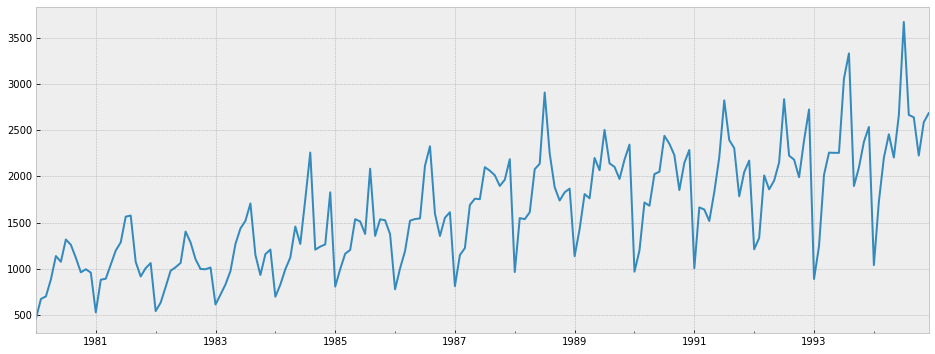

In [3]:
data['Red'].plot(figsize=(16, 6), grid=True);

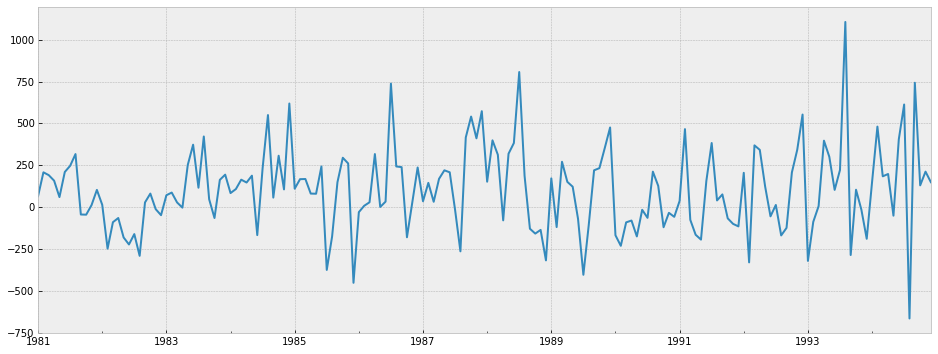

In [4]:
data['Red'].diff(12)[12:].plot(figsize=(16, 6), grid=True);

#### Decompose the time series into _trend, seasonal_ and _resduals_. From the figure above it is seen that we have yearly seasonal pattern. Thus, we can guess seasonal trend of 12 months.

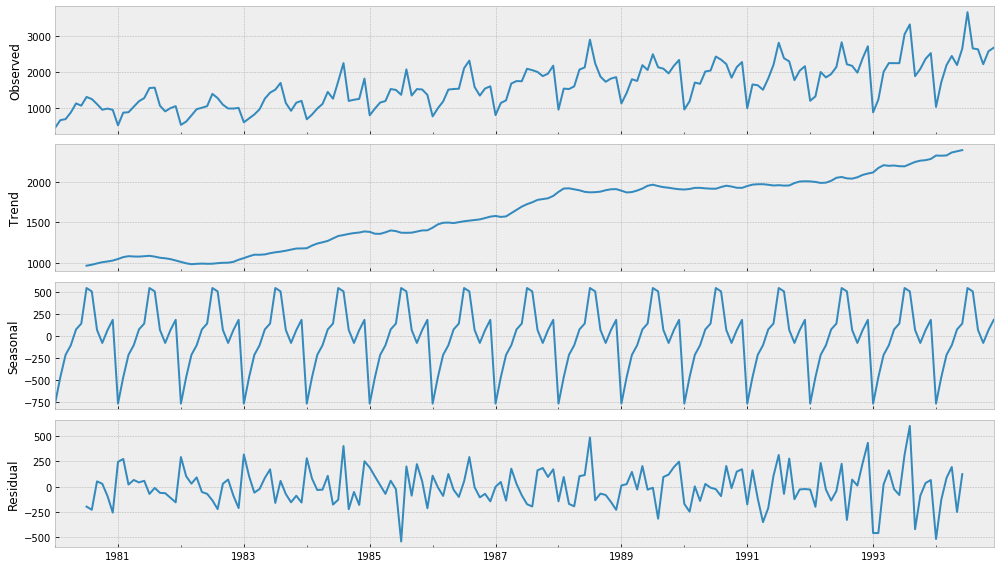

In [7]:
res_seasonal = seasonal_decompose(data['Red'], freq=12, model='additive')
res_seasonal.plot();

#### To have guess on the order of the moving average part of the process, we can plot the autocorrelation function of the process. Recall that the autocorrelation function tends to zero for time indeces larger than _q_.

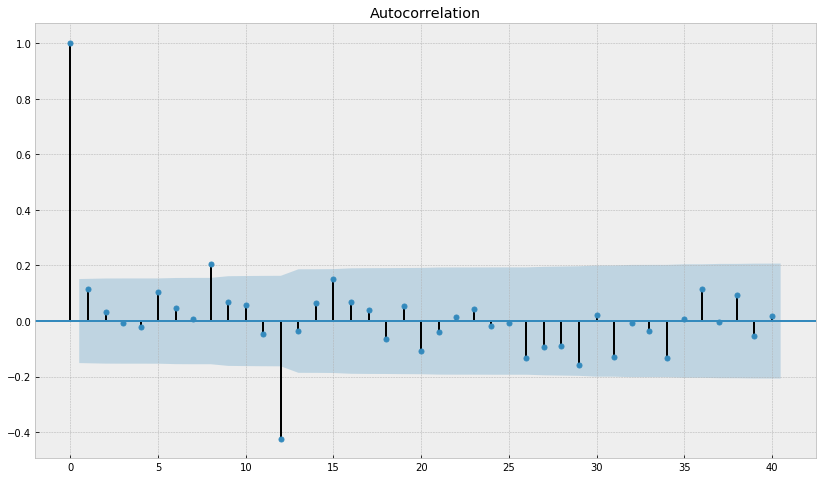

In [8]:
sm.graphics.tsa.plot_acf(data['Red'].diff(12)[12:], lags=40);

#### It is seen from the figure above that the suitable choice for _q_ is 1. To guess the order of _p_ of the AR part of the process, we plot the partial autocorrelation function. Read reference number 1 in extra readings.

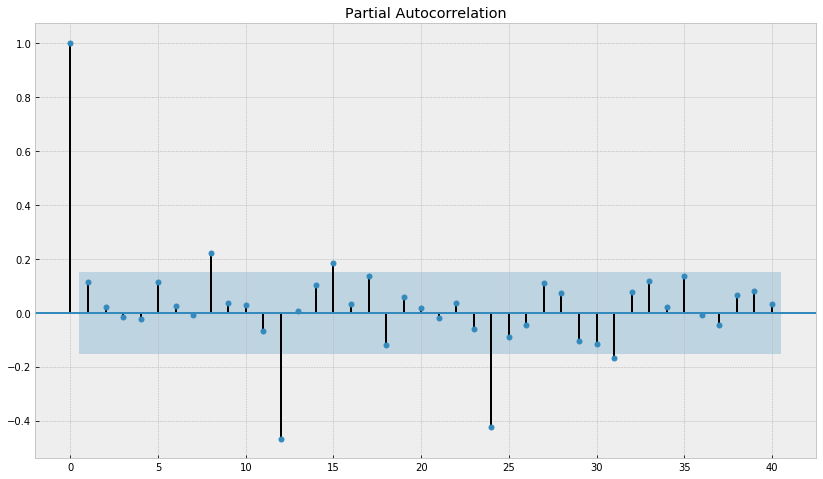

In [9]:
sm.graphics.tsa.plot_pacf(data['Red'].diff(12)[12:], lags=40);

#### Again the suitable choice for _p_ is 1. Since we estimated the seasonality of period 12, we can substract the original dataframe by a time window of size 12. And thus one achieve a stationary process

In [10]:
mod = sarimax.SARIMAX(
    data['Red'].diff(12)[12:], exog=None, order=(1, 0, 1), trend='t',
    mle_regression=True, enforce_stationarity=True, enforce_invertibility=True)

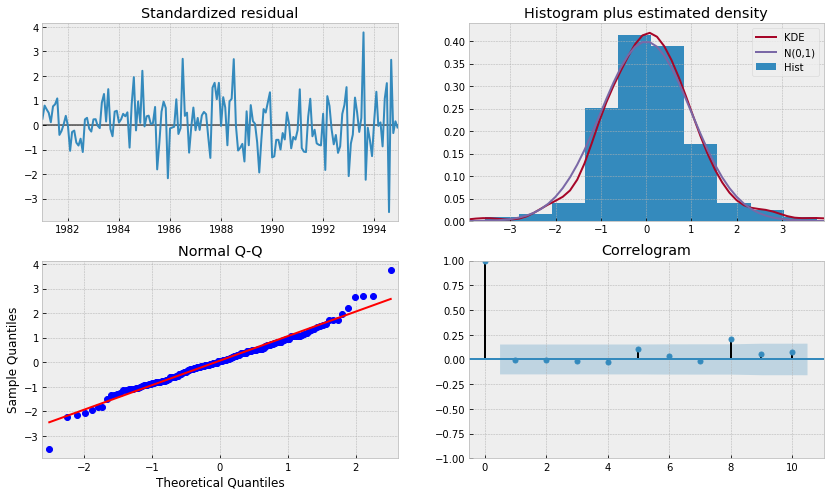

In [11]:
res = mod.fit()
res.plot_diagnostics();

#### In the figure above on the upper left panel we see the time-series after differentiating one time with time window of 12 steps. You can see that the redual (KDE) nicely overlaps with a Gaussian white noise and the correlation function quickly drops to 0. The the sample quantiles and the theoretical quantiles is linear. The performance of the model can be seen in the following summary.

In [12]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                    Red   No. Observations:                  168
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1166.609
Date:                Sun, 15 Mar 2020   AIC                           2341.219
Time:                        15:22:25   BIC                           2353.715
Sample:                    01-01-1981   HQIC                          2346.290
                         - 12-01-1994                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.5918      0.562      1.053      0.292      -0.509       1.693
ar.L1          0.4061      0.534      0.761      0.447      -0.640       1.452
ma.L1         -0.2801      0.544     -0.515      0.606      -1.345       0.785
sigma2      6.296e+04   5572.390     11.298      0.000     5.2e+04    7.39e+04
===================================================================================
Ljung-Box (Q):                       74.77   Jarque-Bera (JB):                17.69
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.57   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Below you can also see that we can use the original dataframe without subtracting the seasonal effect by differentiating but to use the seasonal_order option to mention that we require a seasonal differentiation of order 1 and time window of size 12.

In [13]:
mod = sarimax.SARIMAX(
    data['Red'], exog=None, order=(1, 0, 1), trend='t', seasonal_order=(0, 1, 0, 12),
    mle_regression=True, enforce_stationarity=True, enforce_invertibility=True)

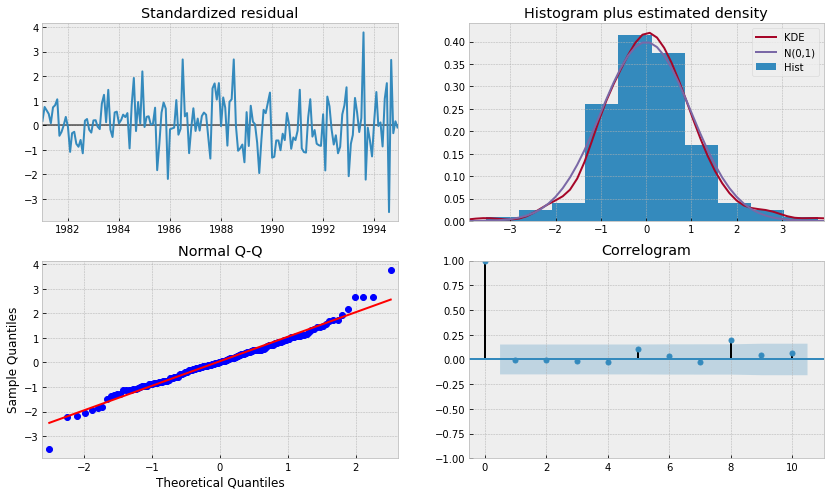

In [14]:
res = mod.fit()
res.plot_diagnostics();

In [15]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                Red   No. Observations:                  180
Model:             SARIMAX(1, 0, 1)x(0, 1, 0, 12)   Log Likelihood               -1166.217
Date:                            Sun, 15 Mar 2020   AIC                           2340.433
Time:                                    15:22:31   BIC                           2352.929
Sample:                                01-01-1980   HQIC                          2345.505
                                     - 12-01-1994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.5687      0.546      1.042      0.297      -0.501       1.638
ar.L1          0.3798      0.563      0.674      0.500      -0.724       1.484
ma.L1         -0.2575      0.572     -0.450      0.652      -1.378       0.863
sigma2      6.268e+04   5530.909     11.332      0.000    5.18e+04    7.35e+04
===================================================================================
Ljung-Box (Q):                       74.92   Jarque-Bera (JB):                18.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.60   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Now let's predict the model and see how the time-series would evolve within the next four years.

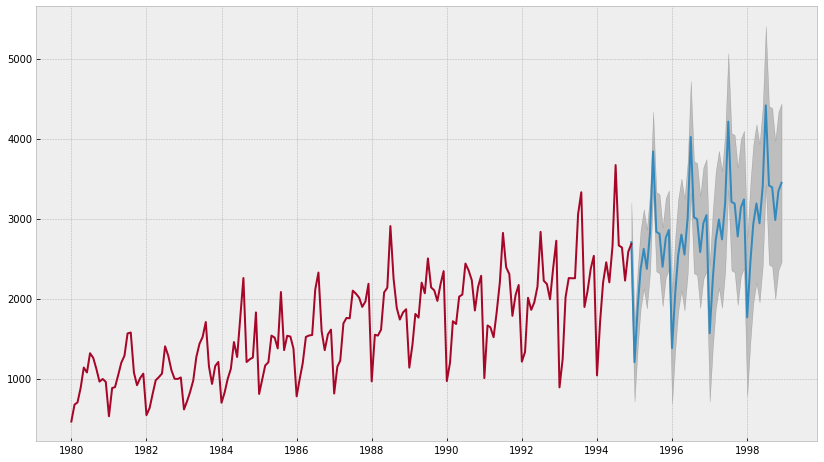

In [16]:
pred = res.get_prediction(start=pd.to_datetime('1994-12-01'),
                              end=pd.to_datetime('1998-12-01'), dynamic=False)
pred_ci = pred.conf_int()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pred.predicted_mean)
ax.plot(data['Red'])
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2);